Accuracy: 81.62%
Precision: 0.69
Recall: 0.56
F1-Score: 0.62
ROC-AUC: 0.74
Confusion Matrix:
 [[940  96]
 [163 210]]


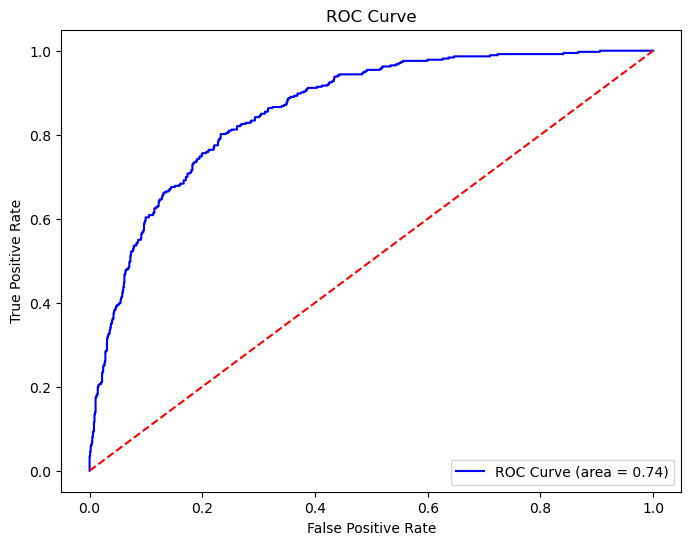

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv('Telco_Customer_Churn_Dataset  (1).csv') # load the dataset
X = df.drop(columns=['Churn', 'customerID'])  # Features
y = df['Churn']  # Target variable
# Label Encoding for categorical variables
lb = LabelEncoder()
for col in X.select_dtypes(include='object'):
    X[col] = lb.fit_transform(X[col])
# Label Encoding for target variable y
y = lb.fit_transform(y)  # Convert 'Yes'/'No' to 1/0
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Model Training
clf = LogisticRegression(max_iter=5000)
clf.fit(X_train, y_train)
# Predictions
y_pred = clf.predict(X_test)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
# Precision
precision = precision_score(y_test, y_pred)
# Recall
recall = recall_score(y_test, y_pred)
# F1-Score
f1 = f1_score(y_test, y_pred)
# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred)
# Confusion Matrix (for deeper analysis)
conf_matrix = confusion_matrix(y_test, y_pred)
# Display the evaluation results
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')
print('Confusion Matrix:\n', conf_matrix)
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Conclusion:
# 1-The model performs well with an accuracy of 81.62%, demonstrating strong ability to predict customer churn.
# 2-An F1-score of 0.62 indicates that the Logistic Regression model has a moderate performance in terms of both precision and recall for predicting customer churn.
# 3-A ROC-AUC score of 0.74 indicates that the Logistic Regression model has a moderate performance in distinguishing between the classes (churn vs. non-churn).
# 3-While the model correctly identifies a majority of churn cases (high recall), there are still 163 false negatives (churn predicted as non-churn).